# Bank Churns Prediction Machine Learning

Project Report by Allentine Paulis

# Table of Contents
* [Project Description](#description)
* [Data](#data)
* [Step 1. Understanding Data and Data Preprocessing](#understanding)
* [Step 2. Train Machine Learning Model](#modeltrain)   
* [Step 3. Improve Machine Learning model Quality](#improve)
* [Step 4. Final Testing](#test)
* [Step 5. Check Sanity Model](#check)
* [Step 6. Overall conclusion](#allconclusion)

# Project Description <a class="anchor" id="description"></a>
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. We have the data on clients’ past behavior and termination of contracts with the bank.

We are going to build a model with the maximum possible F1 score. We need an F1 score of at least 0.59. Check the F1 for the test set. Additionally, measure the AUC-ROC metric and compare it with the F1.

# Data <a class="anchor" id="data"></a>
**Features**
- `RowNumber` — data string index
- `CustomerId` — unique customer identifier
- `Surname` — surname
- `CreditScore` — credit score
- `Geography` — country of residence
- `Gender` — gender
- `Age` — age
- `Tenure` — period of maturation for a customer’s fixed deposit (years)
- `Balance` — account balance
- `NumOfProducts` — number of banking products used by the customer
- `HasCrCard` — customer has a credit card
- `IsActiveMember` — customer’s activeness
- `EstimatedSalary` — estimated salary

**Target**
- `Exited` — сustomer has left

# Step 1. Understanding Data and Data Preprocessing<a class="anchor" id="understanding"></a>

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix

In [233]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/Churn.csv")

In [234]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [236]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [237]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [238]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [239]:
df['Tenure'].isna().sum()/len(df)*100

9.09

Tenure has missing values 999 rows or 9% of the data.

In [240]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Replace the Tenure missing values with 0, assuming that 0 might be less than a year of Tenure or in certain months.

In [241]:
df['Tenure'] = df['Tenure'].fillna(0)

In [242]:
df['Tenure'].isna().sum()

0

In [243]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [244]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

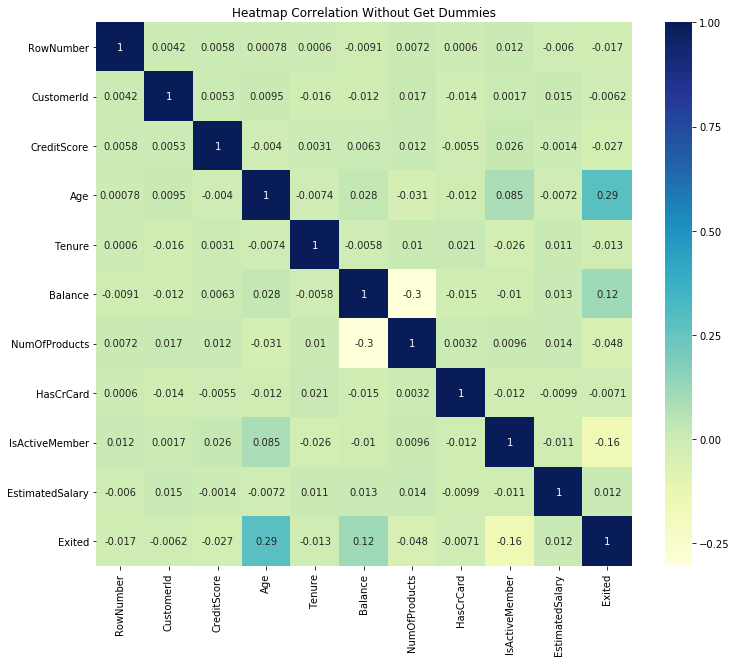

In [245]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap Correlation Without Get Dummies")
plt.show()

In [246]:
# Correlation with no get dummies
df.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.013319
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

Removing Columns that are not needed and not related for the model which are RowNumber, CustomerID, Surname.

In [247]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [248]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Changing the object dtypes which are Geography and Gender with get dummies.

In [249]:
df = pd.get_dummies(df, drop_first=True)

In [250]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


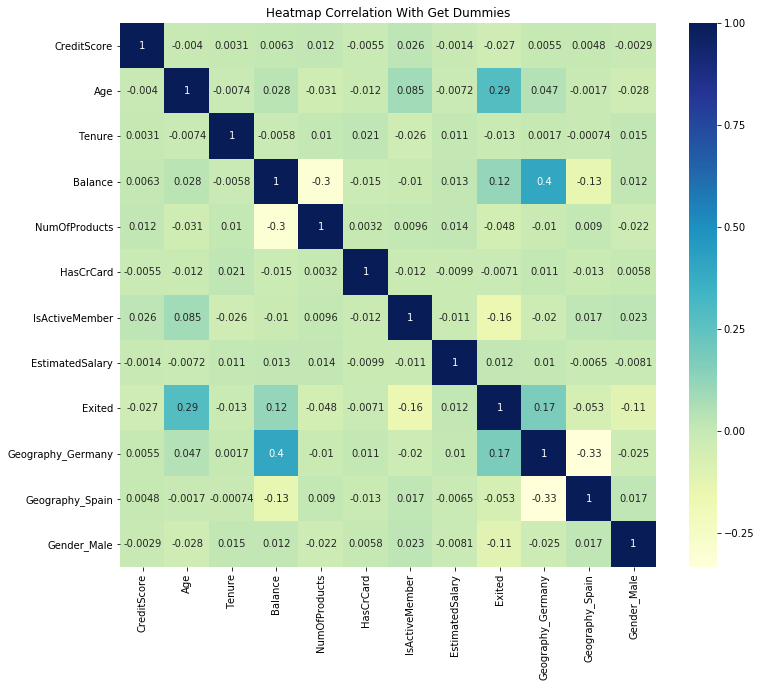

In [251]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap Correlation With Get Dummies")
plt.show()

In [252]:
# Correlation with get dummies
df.corr()['Exited'].sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.013319
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

Age, Geography Germany and Balance has strong positive correlation with Exited. IsActiveMember has strong negative correlation with Exited.

In [253]:
df.duplicated().sum()

0

In [254]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2630,554,36,0.0,157780.93,2,1,0,6089.13,0,1,0,0
6199,449,33,8.0,0.00,2,0,0,156792.89,0,0,1,0
3477,623,40,7.0,0.00,1,1,1,25904.12,0,0,1,0
7999,826,26,5.0,142662.68,1,0,0,60285.30,0,0,0,1
6936,592,31,0.0,84102.11,2,0,1,116385.24,0,0,0,0


## Conclusion

- There are 14 columns and 10000 rows.
- Tenure has missing values 999 rows or 9% of the data.
- Replace the Tenure missing values with 0, assuming that 0 might be less than a year of Tenure or in certain month
- There is no duplicate
- Removing Columns that are not needed and not related for the model which are RowNumber, CustomerID, Surname.
- Changing the object dtypes which are Geography and Gender with get dummies.
- Age, Geography Germany and Balance has strong positive correlation with Exited. IsActiveMember has strong negative correlation with Exited.

# Step 2.  Train Machine Learning Model  <a class="anchor" id="modeltrain"></a>
Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe the findings.

Splitting the data

In [255]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [256]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=12345)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size=0.5, random_state=12345)

In [257]:
print('Training set size:', X_train.shape[0])
print('Validating set size:', X_valid.shape[0])
print('Test set size:',X_test.shape[0])

Training set size: 6000
Validating set size: 2000
Test set size: 2000


## Logistic Regression

In [258]:
LR_model = LogisticRegression(random_state=12345, solver='liblinear')
LR_model.fit(X_train, y_train)
predicted_valid = LR_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, predicted_valid)
print('Accuracy is:', accuracy_valid)
print('F1_Score is:', f1_score(y_valid, predicted_valid))

confusion_matrix(y_valid, predicted_valid)

Accuracy is: 0.7875
F1_Score is: 0.13441955193482688


array([[1542,   35],
       [ 390,   33]])

## Random Forest Classifier

Estimator: 10 Accuracy: 0.8435 F1_Score is: 0.5162287480680061
Estimator: 15 Accuracy: 0.839 F1_Score is: 0.5278592375366569
Estimator: 20 Accuracy: 0.842 F1_Score is: 0.5123456790123456
Estimator: 25 Accuracy: 0.8465 F1_Score is: 0.5397301349325337
Estimator: 30 Accuracy: 0.845 F1_Score is: 0.5245398773006135
Estimator: 35 Accuracy: 0.8495 F1_Score is: 0.5487256371814092
Estimator: 40 Accuracy: 0.847 F1_Score is: 0.5321100917431193
Estimator: 45 Accuracy: 0.8465 F1_Score is: 0.5411061285500747
Estimator: 50 Accuracy: 0.849 F1_Score is: 0.5438066465256798
Estimator: 55 Accuracy: 0.852 F1_Score is: 0.5568862275449102
Estimator: 60 Accuracy: 0.848 F1_Score is: 0.5365853658536586
Estimator: 65 Accuracy: 0.8485 F1_Score is: 0.5416036308623298
Estimator: 70 Accuracy: 0.849 F1_Score is: 0.5424242424242424
Estimator: 75 Accuracy: 0.8475 F1_Score is: 0.542728635682159
Estimator: 80 Accuracy: 0.8485 F1_Score is: 0.5443609022556392
Estimator: 85 Accuracy: 0.8475 F1_Score is: 0.5468053491827638
E

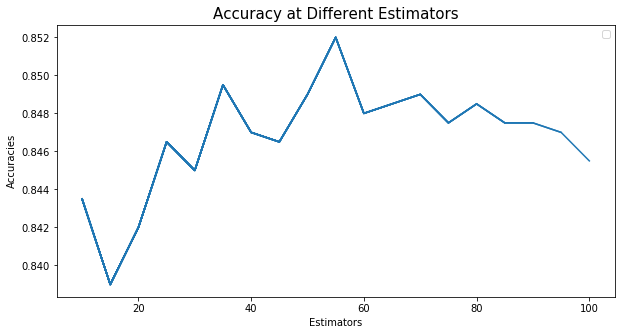

In [259]:
estimators = []
RFC_accuracy = []
plt.figure(figsize=(10, 5))

for estim in range(10,101,5):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    estimators.append(estim)
    RFC_accuracy.append(score)
    print('Estimator:', estim, end='')
    print(' Accuracy:', score, end='')
    print(' F1_Score is:', f1_score(y_valid, y_pred))
    sns.lineplot(data=pd.DataFrame(data=RFC_accuracy, index=estimators))
    plt.legend('')
plt.title("Accuracy at Different Estimators", fontsize=15) 
plt.ylabel("Accuracies") 
plt.xlabel("Estimators")
plt.show()

The best Random Forest Classifier is with n_estimators 55, accuracy 0.852 and f1 score is 0.557

## Conclusion

- The target or y is Exited
- The features or X are CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_Germany, Geography_Spain,  Gender_Male
- The ratio of train : valid : test = 6 : 2 : 2
- The best Random Forest Classifier is with n_estimators 55, accuracy 0.852 and F1 score is 0.557

# Step 3. Improve Machine Learning model Quality  <a class="anchor" id="improve"></a>

## Conclusion

# Step 4. Final Testing  <a class="anchor" id="test"></a>

## Conclusion

# Step 5. Check Sanity Model  <a class="anchor" id="check"></a>
Sanity check the model. 

# Step 6. Overall Conclusion  <a class="anchor" id="allconclusion"></a>